In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.5MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 1.2MB 55.6MB/s 
     |████████████████████████████████| 194kB 55.5MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
%%capture
!cp '/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/data.zip' .
!unzip data.zip

In [ ]:
!cp '/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/data/categories_final.csv' .

In [ ]:
df = pd.read_csv('categories_final.csv')

In [ ]:
df.head()

,file,category
0,/content/data/img/boeing_747/bc39a063495443d8be12d3d2d7bdebf1.jpg,airliner
1,/content/data/img/boeing_747/f52e69829d884cba8aeed26ff7e5a934.jpg,airliner
2,/content/data/img/boeing_747/375b831f6167444fadd9a800c6070ec4.jpg,airliner
3,/content/data/img/boeing_747/3ff53ba65941474bb2ed266adc5ff30b.jpg,airliner
4,/content/data/img/boeing_747/8eaf74a762de46bfb28ba6d8d1470637.jpg,airliner


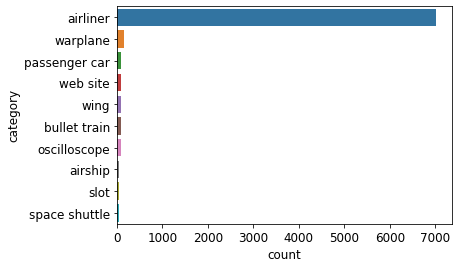

In [ ]:
import seaborn as sns

sns.countplot(y='category',data=df, order=pd.value_counts(df['category']).iloc[:10].index)

In [ ]:
df_not_proper = df[df['category'] != 'airliner']

In [ ]:
df_not_proper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 6 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   file      1803 non-null   object
 1   category  1803 non-null   object
dtypes: object(2)
memory usage: 42.3+ KB


In [ ]:
images_path = Path('/content/data/img')

In [ ]:
for path in df_not_proper['file']:
  Path(path).unlink()

In [ ]:
len(get_image_files(images_path))

7011

## Train new model on cleared dataset

In [ ]:
airplanes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=44),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
)
dataloaders = airplanes.dataloaders(images_path)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
learn = cnn_learner(dataloaders, resnet50, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.724057,2.042336,0.610556,01:01


epoch,train_loss,valid_loss,error_rate,time
0,1.694849,1.434272,0.473609,01:23
1,1.260298,1.241337,0.399429,01:23
2,0.926720,1.148399,0.328816,01:23
3,0.627779,1.079226,0.298146,01:23
4,0.418566,0.959410,0.272468,01:23
5,0.293845,0.915699,0.228245,01:23
6,0.191365,0.836925,0.201141,01:23
7,0.126951,0.793132,0.198288,01:23
8,0.099389,0.784309,0.196148,01:23
9,0.069944,0.784271,0.198288,01:23


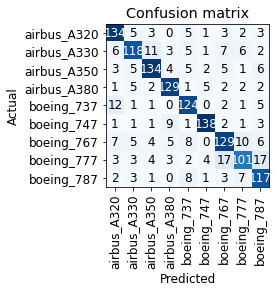

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

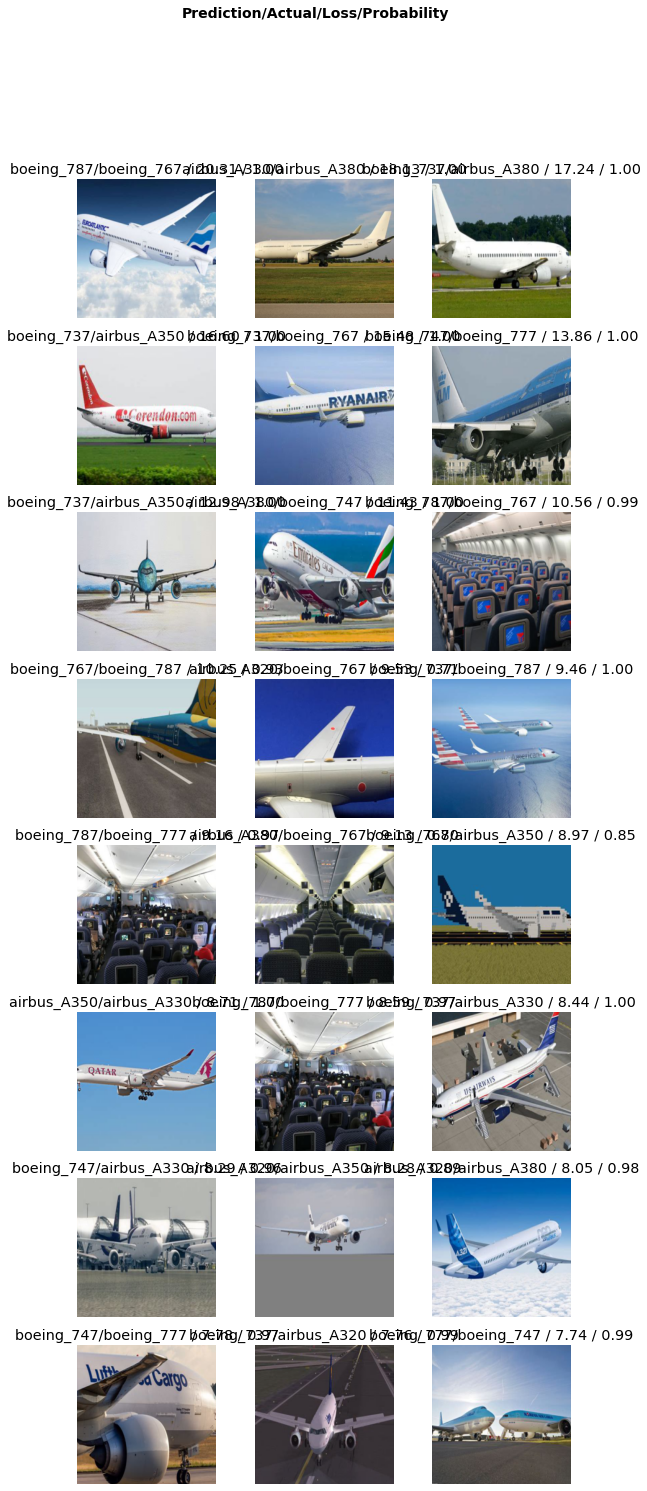

In [ ]:
interp.plot_top_losses(24, nrows=8)

In [ ]:
learn.export(fname='resnet50_v2.pkl')
!cp resnet50_v2.pkl '/content/gdrive/MyDrive/Colab Notebooks/AirplanesClassifier/models/'